학번: 202120634 / 짝수로 끝나는 학생은 wine_review.csv를 분석

In [2]:
import pandas as pd

df = pd.read_csv('./wine_review.csv')
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [3]:
# 필요한 라이브러리 설치 및 임포트
%pip install nltk
%pip install vaderSentiment

import nltk
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# 데이터 불러오기 
df = pd.read_csv('wine_review.csv')

# 결측치 처리: 'reviews.text'와 'reviews.rating' 열의 결측값을 빈 문자열로 채움
df['reviews.text'].fillna('', inplace=True)
df['reviews.rating'].fillna(0, inplace=True)

# 출력 확인
print(df[['reviews.text']].head())

                                        reviews.text
0      This a fantastic white wine for any occasion!
1   Tart, not sweet...very refreshing and delicious!
2  I was given this wine so it was a delightful s...
3  This is a phenomenal wine and my new favorite ...
4  4 750ml bottles for the price of two With way ...


/tmp/ipykernel_1329/2366232378.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews.text'].fillna('', inplace=True)
/tmp/ipykernel_1329/2366232378.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 데이터 전처리 준비
stop_words = set(nltk.corpus.stopwords.words('english'))

# 텍스트 토큰화 및 불용어 제거 함수 정의
def tokenize_and_remove_stopwords(text):

    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 불필요한 공백 제거
    text = ' '.join(text.split())
    # 토큰화
    tokens = nltk.word_tokenize(text)
    # 불용어 제거 (강조 단어 제외)
    important_words = {'very', 'extremely', 'quite'}
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words or word.lower() in important_words]
    return tokens

# 토큰화 및 불용어 제거 적용
df['tokenized_text'] = df['reviews.text'].apply(tokenize_and_remove_stopwords)

# 출력 확인
print(df[['reviews.text', 'tokenized_text']])

                                           reviews.text  \
0         This a fantastic white wine for any occasion!   
1      Tart, not sweet...very refreshing and delicious!   
2     I was given this wine so it was a delightful s...   
3     This is a phenomenal wine and my new favorite ...   
4     4 750ml bottles for the price of two With way ...   
...                                                 ...   
2885  I only like a sweet wine. I was skeptical on o...   
2886  I ordered a 3 bottle set of both the Meritage ...   
2887  I ordered the White Zinfadel in the 3 bottle s...   
2888  This was my first purchase of these wines. Tri...   
2889  I don't know why the negative reviews said the...   

                                         tokenized_text  
0                    [fantastic, white, wine, occasion]  
1              [tart, sweetvery, refreshing, delicious]  
2     [given, wine, delightful, surprise, find, flav...  
3                [phenomenal, wine, new, favorite, red]  
4

In [6]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# 표제어 추출
lemmatizer = WordNetLemmatizer()
df['processed_text'] = df['tokenized_text'].apply(lambda tokens: ' '.join([lemmatizer.lemmatize(token) for token in tokens]))

# SentimentIntensityAnalyzer 객체 생성
analyzer = SentimentIntensityAnalyzer()

# VADER 감정 분석 적용
df['vader_scores'] = df['processed_text'].apply(lambda x: analyzer.polarity_scores(x))
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])

# 결과 확인
print(df[['reviews.text', 'processed_text', 'reviews.rating']].head())

# 전처리된 텍스트와 점수를 포함하는 파일로 저장
df[['reviews.text', 'processed_text', 'reviews.rating']].to_csv('cleaned_wine_review.csv', index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        reviews.text  \
0      This a fantastic white wine for any occasion!   
1   Tart, not sweet...very refreshing and delicious!   
2  I was given this wine so it was a delightful s...   
3  This is a phenomenal wine and my new favorite ...   
4  4 750ml bottles for the price of two With way ...   

                                      processed_text  reviews.rating  
0                      fantastic white wine occasion             5.0  
1                tart sweetvery refreshing delicious             5.0  
2  given wine delightful surprise find flavorful ...             5.0  
3                   phenomenal wine new favorite red             5.0  
4  ml bottle price two way le packaging yes pleas...             5.0  


In [7]:
%pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 데이터 불러오기
df = pd.read_csv('cleaned_wine_review.csv')

# NaN 값 처리: 빈 문자열로 대체
df['processed_text'].fillna('', inplace=True)

# VADER 초기화
analyzer = SentimentIntensityAnalyzer()

# 감정 점수 계산 함수 정의
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# 'processed_text' 열의 각 텍스트에 대해 감정 점수 계산
df['sentiment_score'] = df['processed_text'].apply(analyze_sentiment)

# 결과 확인
print(df[['processed_text', 'sentiment_score']])

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_1329/968434302.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['processed_text'].fillna('', inplace=True)


                                         processed_text  sentiment_score
0                         fantastic white wine occasion           0.5574
1                   tart sweetvery refreshing delicious           0.5719
2     given wine delightful surprise find flavorful ...           0.9118
3                      phenomenal wine new favorite red           0.4588
4     ml bottle price two way le packaging yes pleas...           0.6669
...                                                 ...              ...
2885  like sweet wine skeptical ordering without tas...           0.8325
2886  ordered bottle set meritage moscata wine frien...           0.9682
2887  ordered white zinfadel bottle selection arrive...           0.9814
2888  first purchase wine tried moscato like sweet w...           0.8176
2889  dont know negative review said wine tasted hor...           0.6906

[2890 rows x 2 columns]


In [8]:
# reviews.rating과 VADER 감정 점수 비교 및 일치 여부 확인 함수 정의
def compare_scores(row):
    if row['reviews.rating'] > 2.5:
        expected_sentiment = 'positive'
    elif row['reviews.rating'] < 2.5:
        expected_sentiment = 'negative'
    else:
        expected_sentiment = 'neutral'

    if row['sentiment_score'] >= 0.2:
        predicted_sentiment = 'positive'
    elif row['sentiment_score'] <= -0.2:
        predicted_sentiment = 'negative'
    else:
        predicted_sentiment = 'neutral'

    return expected_sentiment == predicted_sentiment

# Match 열 추가
df['Match'] = df.apply(compare_scores, axis=1)

# 결과 확인
print(df[['reviews.rating', 'sentiment_score', 'Match']])

      reviews.rating  sentiment_score  Match
0                5.0           0.5574   True
1                5.0           0.5719   True
2                5.0           0.9118   True
3                5.0           0.4588   True
4                5.0           0.6669   True
...              ...              ...    ...
2885             5.0           0.8325   True
2886             5.0           0.9682   True
2887             5.0           0.9814   True
2888             5.0           0.8176   True
2889             5.0           0.6906   True

[2890 rows x 3 columns]


In [9]:
# Match가 True인 비율 계산
match_count = df['Match'].sum()
total_count = len(df)
match_ratio = match_count / total_count
print(f"Matching ratio: {match_ratio:.2%}")

Matching ratio: 68.75%


In [10]:
# 불일치하는 리뷰 필터링
mismatched_reviews = df[~df['Match']]

# 결과 출력
print("불일치하는 리뷰:")
print(mismatched_reviews[['reviews.rating', 'sentiment_score', 'processed_text']])

불일치하는 리뷰:
      reviews.rating  sentiment_score  \
7                2.0           0.6908   
16               2.0          -0.0829   
17               5.0          -0.1779   
30               5.0          -0.1200   
44               2.0           0.0734   
...              ...              ...   
2866             2.0           0.8316   
2871             2.0           0.9456   
2872             2.0           0.7351   
2874             2.0          -0.0258   
2876             1.0           0.7074   

                                         processed_text  
7     would give one star came clean bottle called s...  
16    im sure bad bottle intentionally made efferves...  
17    obsessed new drinkhowever sold every target la...  
30    wine sooooo good usually dont like cabernet sp...  
44    taste absolutely fine chardonnay however bottl...  
...                                                 ...  
2866  im wine snob ive fair share wine year taste ne...  
2871  wish returned wine graduall

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('cleaned_wine_review.csv')

# 결측치 처리: 빈 문자열로 대체
df['processed_text'].fillna('', inplace=True)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

# 레이블 설정
y = df['reviews.rating']

# 학습 및 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 정의
lr_model = LogisticRegression(random_state=42)

# 그리드 서치를 사용한 하이퍼파라미터 튜닝
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

/tmp/ipykernel_1329/375276445.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['processed_text'].fillna('', inplace=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.4s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   0.3s
[CV] END ................................C=0.001, penalty=l2; total time=   0.2s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=   1.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.9s
[CV] END ..................................C=100, penalty=l2; total time=   1.0s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=   1.0s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the 

[CV] END ..................................C=100, penalty=l2; total time=   1.2s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [12]:
# 최적의 모델 및 하이퍼파라미터 출력
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l2'}


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 교차 검증을 사용한 모델 평가
cv_results = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross Validation Mean Accuracy: {cv_results.mean():.4f}")


Cross Validation Mean Accuracy: 0.7318


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# 최적의 모델로 테스트 세트에 대해 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)  # 다중 클래스 분류의 경우 각 클래스에 대한 확률 추출

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# ROC-AUC는 다중 클래스 분류일 때 ovr (one-vs-rest) 방식으로 계산
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# 소수점 4자리까지 출력
print(f"Accuracy: {accuracy:.4f}") #정확도
print(f"Precision: {precision:.4f}") #정밀도
print(f"Recall: {recall:.4f}") #재현율
print(f"F1 Score: {f1:.4f}") #F1 점수
print(f"ROC-AUC: {roc_auc:.4f}") #양성과 음성을 구분

Accuracy: 0.7232
Precision: 0.6788
Recall: 0.7232
F1 Score: 0.6412
ROC-AUC: 0.8122


In [15]:
# 교차 검증 점수와 테스트 점수 비교
print(f"교차검증 정확도: {grid_search.best_score_}")
print(f"테스트 세트 정확도: {accuracy}")

교차검증 정확도: 0.7318401540863745
테스트 세트 정확도: 0.7231833910034602


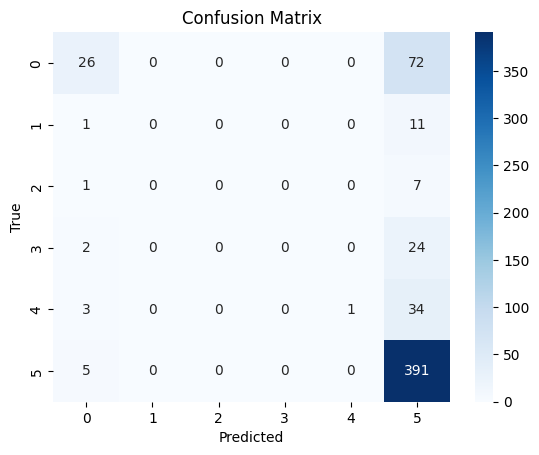

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 최적의 모델로 테스트 세트에 대해 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

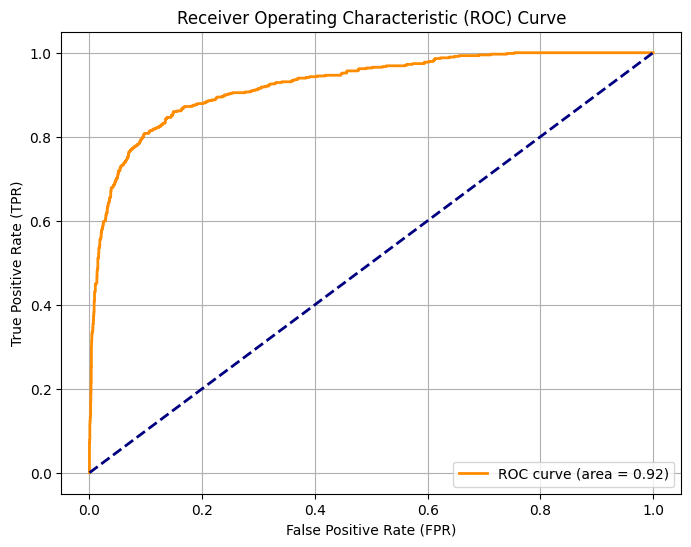

AUC: 0.9243


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 예측 생성
y_score = best_model.predict_proba(X_test)

# 다중 클래스를 이진 분류로 변환 (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=best_model.classes_)

# 평균 ROC 곡선 및 AUC 계산
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# AUC 출력
print(f"AUC: {roc_auc:.4f}")